## Importing data using dask.dataframe is faster than pandas

Open() method
Using pandas

using dask [faster than pandas for larger data sets]

In [3]:
# Setting working directory
import os
os.getcwd()
os.chdir('D:\Learning\Learn Python git hub')
os.getcwd()


'D:\\Learning\\Learn Python git hub'

In [3]:
import pandas as pd
data_pandas = pd.read_csv("benign_traffic.csv")
data_pandas.shape

(49548, 115)

In [5]:
# Using dask for a data set with 49548 rows

import pandas as pd
import dask.dataframe as dd
import time

# Reading with pandas
t0 = time.time()

data_pandas = pd.read_csv("benign_traffic.csv")
t1 = time.time()

time_pandas = round((t1-t0)*1000, 2)

print('Data Size is: ', data_pandas.shape)
print('Time taken by pandas to read the file : ', time_pandas)

D:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Size is:  (49548, 115)
Time taken by pandas to read the file :  680.85


In [6]:
# Reading with Dask
t2 = time.time()

data_dask = dd.read_csv("benign_traffic.csv")
t3 = time.time()

time_dask = round((t3-t2)*1000, 2)

print('Time taken by dask to read the file : ', time_dask)


Time taken by dask to read the file :  70.45


In [18]:
data=[]
data.append(time_pandas)
data.append(time_dask)
categories=["Pandas", "Dask"]
data

[1850.85, 74.84]

In [19]:
data1 = {"Pandas": time_pandas, "Dask": time_dask}
data1

{'Pandas': 1850.85, 'Dask': 74.84}

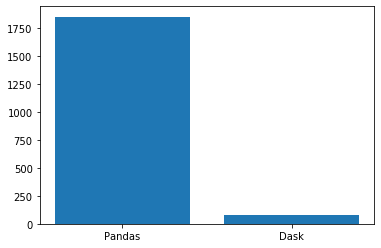

In [21]:
import matplotlib.pyplot as plt

plt.bar(range(len(data1)), list(data1.values()), align='center')
plt.xticks(range(len(data1)), list(data1.keys()))

# # for python 2.x:
# plt.bar(range(len(data1)), data1.values(), align='center')  # python 2.x
# plt.xticks(range(len(data1)), data1.keys())  # in python 2.x

plt.show()

In [30]:
data_dask.dtypes
data_dask.shape
data_dask.describe()
# data_dask.mean()
# data_dask.columns
# data_dask.MI_dir_L5_weight
# data_dask['MI_dir_L5_weight']
# data_dask[['MI_dir_L5_weight', 'MI_dir_L5_mean']]

MI_dir_L5_weight         float64
MI_dir_L5_mean           float64
MI_dir_L5_variance       float64
MI_dir_L3_weight         float64
MI_dir_L3_mean           float64
                          ...   
HpHp_L0.01_std           float64
HpHp_L0.01_magnitude     float64
HpHp_L0.01_radius        float64
HpHp_L0.01_covariance    float64
HpHp_L0.01_pcc           float64
Length: 115, dtype: object

In [23]:
# Convert dask dataframe to pandas

df = data_dask.compute()
df.shape

(49548, 115)

In [27]:
df.describe()
df.dtypes

MI_dir_L5_weight         float64
MI_dir_L5_mean           float64
MI_dir_L5_variance       float64
MI_dir_L3_weight         float64
MI_dir_L3_mean           float64
                          ...   
HpHp_L0.01_std           float64
HpHp_L0.01_magnitude     float64
HpHp_L0.01_radius        float64
HpHp_L0.01_covariance    float64
HpHp_L0.01_pcc           float64
Length: 115, dtype: object

## In build data sets

R, by default comes with a set of in-built datasets. There are some datasets which come with the SkiKit- Learn package



In [3]:
#Python
import sklearn as sklearn
import pandas as pd
from sklearn import datasets
# This creates a Sklearn bunch
data = datasets.load_iris()
# Convert to Pandas dataframe
iris = pd.DataFrame(data.data, columns=data.feature_names)
print(iris.head())
iris.shape

(150, 4)

In [5]:
print(iris.iloc[3])
print(iris[:5], '\n')
# In python we can select columns by column name as follows
print(iris['sepal length (cm)'][2:6], '\n')
#If you want to select more than 1 columns then you must use the double '[[]]' since the 
# index is a list itself
print(iris[['sepal length (cm)','sepal width (cm)']][4:7])

sepal length (cm)    4.6
sepal width (cm)     3.1
petal length (cm)    1.5
petal width (cm)     0.2
Name: 3, dtype: float64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

2    4.7
3    4.6
4    5.0
5    5.4
Name: sepal length (cm), dtype: float64 

   sepal length (cm)  sepal width (cm)
4                5.0               3.6
5                5.4               3.9
6                4.6               3.4


In [10]:
# to select on column
iris['sepal length (cm)']

iris[['sepal length (cm)']]

# both single and double bracket works

# to select 2 columns
# iris['sepal length (cm)', 'sepal width (cm)'] throws an error

# iris[['sepal length (cm)', 'sepal width (cm)']] 


# For pandas objects (Series, DataFrame), the indexing operator [] only accepts
# For df[[colname(s)]], the interior brackets are for list, and the outside brackets are indexing operator, 
# i.e. you must use double brackets if you select two or more columns. 
# With one column name, single pair of brackets returns a Series, while double brackets return a dataframe.
# refer: https://stackoverflow.com/questions/33417991/pandas-why-are-double-brackets-needed-to-select-column-after-boolean-indexing

# modern appraoch is 
# df.ix[df['A'] < 3,['A','C']] or df.loc[df['A'] < 3,['A','C']] 

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9
